In [1]:
import numpy as np

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


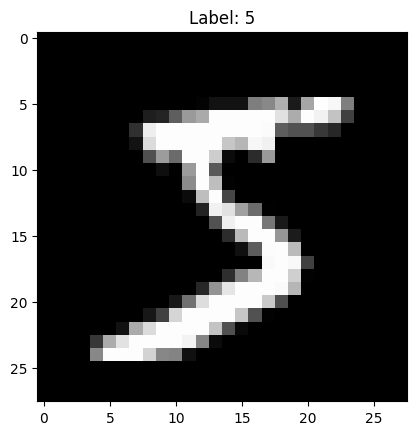

In [3]:
# Display the first training image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
# Print the raw pixel values of the first image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
# Display the shapes of the dataset
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
# Reshape the image data into 2D vectors (flatten 28x28 into 784)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [7]:
# One-hot encode the labels
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [8]:
# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [10]:
# Train the model
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20


469/469 [==============================] - 4s 7ms/step - loss: 0.2569 - accuracy: 0.9205 - val_loss: 0.1232 - val_accuracy: 0.9589
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1046 - accuracy: 0.9679 - val_loss: 0.0975 - val_accuracy: 0.9708
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0675 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0668 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0719 - val_accuracy: 0.9804
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0647 - val_accuracy: 0.9822
Epoc

In [11]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08372168242931366
Test accuracy: 0.9848999977111816
